In [1]:
import networkx as nx
import numpy as np
import network_design as nd
import matplotlib.pyplot as plt
import scipy.linalg as la

# Fig 1.
We have two simple particles which are placed into our system.
We generate the distributions for the microcanonical ensemble and canonical ensemble. 
We do this for 2, 3 and 4 particles.

In [2]:
# Create particles
O = np.array([[0,4],[2,1]])
# Initialize network
particle_1 = nx.DiGraph()
particle_1.add_edges_from([[0,1],[0,2]])
particle_1_pos = {0:(0,0),1:(-1,0),2:(1,0),3:(0,1),4:(0,-1)}

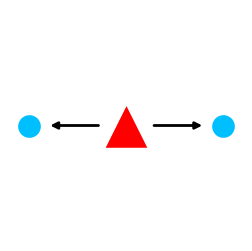

In [3]:
fig = plt.figure(figsize=(3,3))
nx.draw_networkx_nodes(nx.subgraph(particle_1,{1,2}),
                       pos=particle_1_pos,
                       node_color='deepskyblue',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_nodes(nx.subgraph(particle_1,{0}),
                       pos=particle_1_pos,
                       node_color='red',
                       linewidths=1,
                       node_size=1000,
                       node_shape='^',
                       edgecolors='w')  
nx.draw_networkx_edges(particle_1,
                       pos=particle_1_pos,
                       arrows=True,
                       width=2,
                      min_source_margin=20,
                      min_target_margin=15)
plt.axis('off')
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.savefig('figs/drafts/v2/fig1/particle1.pdf')
plt.show()

In [4]:
particle_2 = nx.DiGraph()
particle_2.add_edges_from([[0,1],[0,2],[0,3]])
particle_2_pos = {0:(0,0),1:(-1,-1),2:(0,1.414214),3:(1,-1)}

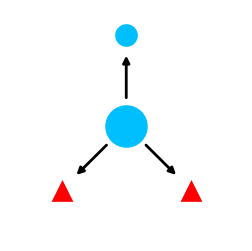

In [5]:
fig = plt.figure(figsize=(3,3))
nx.draw_networkx_nodes(nx.subgraph(particle_2,{1,3}),
                       pos=particle_2_pos,
                       node_color='red',
                       linewidths=1,
                       node_shape='^',
                       edgecolors='w')
nx.draw_networkx_nodes(nx.subgraph(particle_1,{0}),
                       pos=particle_2_pos,
                       node_color='deepskyblue',
                       linewidths=1,
                       node_size=1000,
                       node_shape='o',
                       edgecolors='w') 
nx.draw_networkx_nodes(nx.subgraph(particle_1,{2}),
                       pos=particle_2_pos,
                       node_color='deepskyblue',
                       linewidths=1,
                       node_shape='o',
                       edgecolors='w')  
nx.draw_networkx_edges(particle_2,
                       pos=particle_2_pos,
                       width=2,
                       arrows=True,
                      min_source_margin=20,
                      min_target_margin=15)
plt.axis('off')
plt.xlim(-1.8,1.8)
plt.ylim(-1.8,1.8)
plt.savefig('figs/drafts/v2/fig1/particle_2.pdf')
plt.show()

## Generate networks with given particles

In [6]:
def draw_two_particle_network(g,X,pos=None,file=None,figsize=(10,10),with_labels=False,directed=False):
    """
    Draw particle network in style of Fig. 1
    
    Parameters:
        g (networkx)
        X (ndarray) - node labels
    """
    fig = plt.figure(figsize=figsize)
    # create weighted graph from M
#     g = nx.Graph()
#     for u,v,data in M.edges(data=True):
#         w = data['weight'] if 'weight' in data else 1.0
#         if g.has_edge(u,v):
#             g[u][v]['weight'] += w
#         else:
#             g.add_edge(u, v, weight=w)
            
    if pos is None:
        pos = nx.spring_layout(g)
        
    
    for edge in g.edges(data='weight'):
        if directed:
            nx.draw_networkx_edges(g,pos=pos,edgelist=[edge],arrowsize=20)
        else:
            nx.draw_networkx_edges(g,pos=pos,edgelist=[edge])
    
    # Draw particles \theta_1
    nx.draw_networkx_nodes(nx.subgraph(g,set(np.where(X[:,0]==1)[0])),
                       pos=pos,
                       node_color='red',
                       linewidths=1,
                       node_shape='^',
                       edgecolors='w')
    
    # Draw particles \theta_2
    nx.draw_networkx_nodes(nx.subgraph(g,set(np.where(X[:,1]==1)[0])),
                       pos=pos,
                       node_color='deepskyblue',
                       linewidths=1,
                       node_shape='o',
                       edgecolors='w')
    
    
    if with_labels:
        nx.draw_networkx_labels(g,pos)
        
    if file != None:
        plt.savefig(file)
    plt.axis('off')
    plt.show()


### Three particles

In [7]:
capacities = {0:{0:0,1:2},1:{0:2,1:1}}

In [8]:
X = np.array([[1,0],
              [1,0],
              [1,0],
              [0,1],
              [0,1]])

In [11]:
A_nets = []
nd.microcanonical_ensemble?

Signature:
nd.microcanonical_ensemble(
    X,
    O,
    ret_H=False,
    directed=False,
    time_of_entry=None,
    multiedge=False,
    ret_cap=False,
)
Docstring:
Generate a microcanonical ensemble for network design.

Parameters:
    X (ndarray): Node assignment matrix (one-hot encoded).
    capacities (dict): Connection capacities for each node and label.
    ret_H (bool): Reserved parameter (currently unused).
    directed (bool): Whether the network is directed.
    time_of_entry (ndarray, optional): Entry times of nodes. Defaults to all zeros.
    self_loops (bool): Whether self-loops are allowed.
    ret_cap (bool): Whether to return updated capacities.

Returns:
    nx.Graph or tuple: Generated graph, optionally with updated capacities.
File:      /work/ccnr/glover.co/net_design/network_design.py
Type:      function

In [16]:
graph_count = []
for _ in range(10000):
    theta1_2_theta2_3 = nd.microcanonical_ensemble(X,nd.create_O(capacities))
    count_graph_occurrences(graph_count,theta1_2_theta2_3)


In [13]:
pos = nx.kamada_kawai_layout(theta1_2_theta2_3[0])

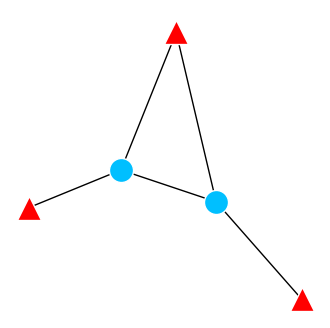

In [14]:
draw_two_particle_network(nx.from_numpy_array(A_nets[5]),X,figsize=(4,4))

In [17]:
graph_count

[(<networkx.classes.graph.Graph at 0x2b2684bf0c50>, 6698),
 (<networkx.classes.graph.Graph at 0x2b2684bf0e00>, 3302)]

In [47]:
draw_two_particle_network(theta1_2_theta2_3[0],X,figsize=(4,4),with_labels=True)

TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

<Figure size 288x288 with 0 Axes>

In [75]:
uniq_networks = set([tuple(A_nets[i].flatten()) for i in range(len(A_nets))])

In [15]:
def count_graph_occurrences(graph_count_list, new_graph):
    """
    Count occurrences of unique graphs based on isomorphism.

    Parameters:
        graph_count_list (list): List of tuples [(graph, count), ...].
        new_graph (nx.Graph): The new graph to check and count.

    Returns:
        None: Updates the graph_count_list in place.
    """
    for i, (existing_graph, count) in enumerate(graph_count_list):
        if nx.is_isomorphic(existing_graph, new_graph):
            graph_count_list[i] = (existing_graph, count + 1)  # Increment the count
            return

    # If no isomorphic graph is found, add the new graph with count 1
    graph_count_list.append((new_graph, 1))

In [87]:
pos=nx.circular_layout(nx.from_numpy_array(A_nets[5]))

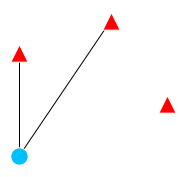

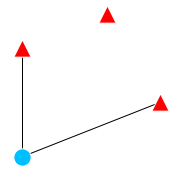

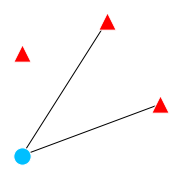

In [76]:
for i,A in enumerate(uniq_networks):
    draw_two_particle_network(nx.from_numpy_array(np.array(A).reshape(4,4)),X,pos=pos,figsize=(3,3),file=f'figs/drafts/v2/fig1/four_particles/g{i}.pdf')

In [102]:
len(uniq_networks)

9

In [130]:
count = {i: 0 for i in range(len(uniq_networks))}
for A in A_nets:
    for j in range(len(uniq_networks)):
        if np.linalg.norm(A - np.array(list(uniq_networks)[j]).reshape(5,5)) == 0:
            count[j] += 1

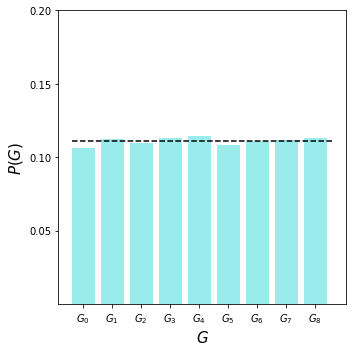

In [131]:
plt.figure(figsize=(5,5))
plt.bar(np.arange(9),np.array(list(count.values()))/sum(list(count.values())),align='edge',color='darkturquoise',alpha=.4)
plt.xticks(np.array([.4,1.4,2.4,3.4,4.4,5.4,6.4,7.4,8.4]),[f'$G_{i}$' for i in range(9)])
plt.hlines(1/9,0,9,linestyles='--',color='k')
plt.yticks(np.array([.05,.1,.15,.2]))
plt.ylim(0,.2)
plt.xlabel('$G$',fontsize=15)
plt.ylabel('$P(G)$',fontsize=15)
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig1/microcanonical_dist.pdf')
plt.show()

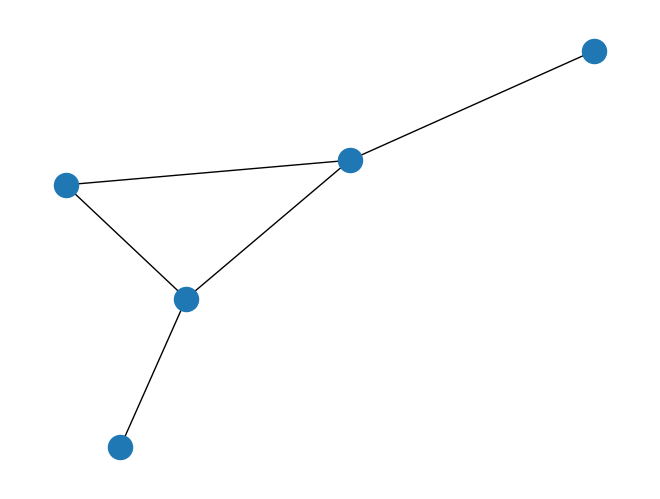

In [28]:
nx.draw(graph_count[0][0])

In [19]:
count = np.array([c for _,c in graph_count])

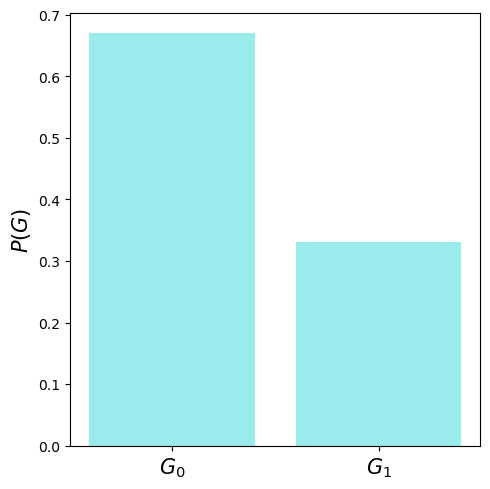

In [27]:
plt.figure(figsize=(5,5))
plt.bar(np.arange(2),count/count.sum(),align='edge',color='darkturquoise',alpha=.4)
# plt.xticks(np.array([.4,1.4,2.4,3.4,4.4,5.4,6.4,7.4,8.4]),[f'$G_{i}$' for i in range(9)])
plt.xticks(np.array([.4,1.4]),['$G_{0}$','$G_{1}$'],fontsize=15)
# plt.hlines(1/9,0,9,linestyles='--',color='k')
# plt.yticks(np.array([.05,.1,.15,.2]))
# plt.ylim(0,.2)
# plt.xlabel('$G$',fontsize=15)
plt.ylabel('$P(G)$',fontsize=15)
plt.tight_layout()
plt.savefig('figs/drafts/v5/fig1/unlabeled_microcanonical_dist.pdf')
plt.show()

In [14]:
N_vec = X.sum(axis=0)
O = np.array([[0,2],[2,1]])

In [7]:
g = nd.canonical_ensemble(N_vec,O,X)

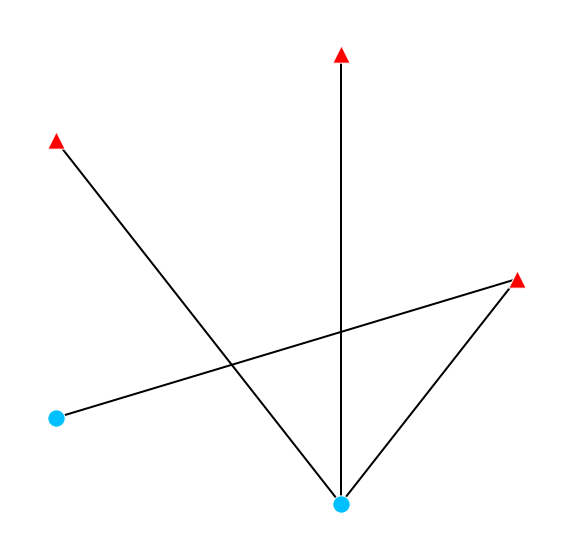

In [8]:
draw_two_particle_network(g,X,pos=nx.circular_layout(g))

In [90]:
canonical_A = []
for _ in range(100000):
    g = nd.canonical_ensemble(N_vec,O,X)
    canonical_A.append(nx.adjacency_matrix(g).toarray())

In [91]:
uniq_canonical_networks = list(set([tuple(canonical_A[i].flatten()) for i in range(len(canonical_A))]))

In [92]:
np.array(list(uniq_canonical_networks[0])).reshape((5,5))

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.]])

In [109]:
canonical_count = {i: 0 for i in range(len(uniq_canonical_networks))}
for A in canonical_A:
    for j in range(len(uniq_canonical_networks)):
        if np.linalg.norm(A - np.array(uniq_canonical_networks[j]).reshape(5,5)) == 0:
            canonical_count[j] += 1
            continue

In [110]:
y = np.array(list(canonical_count.values()),dtype=float)

In [111]:
y /= y.sum()

In [112]:
idx = np.argsort(y)

In [113]:
x = np.array(list(canonical_count.keys()))

In [114]:
x = x[idx]
y = y[idx]

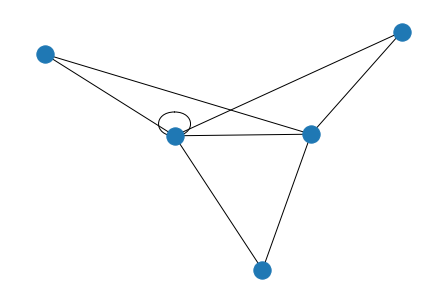

In [117]:
nx.draw(nx.from_numpy_array(np.array(uniq_canonical_networks[x[-5]]).reshape(5,5)))

In [99]:
P = np.zeros((5,5))
for i in range(5):
    for j in range(i,5):
        # Get labels of nodes
        theta_i = np.where(X[i]==1)[0][0]
        theta_j = np.where(X[j]==1)[0][0]
        P[i,j] = np.min([1,np.min([O[theta_i,theta_j]/N_vec[theta_j],O[theta_j,theta_i]/N_vec[theta_i]])])

In [100]:
# Calculate expected probability
p = np.zeros(len(y))
for q,k in enumerate(x):
    # Get network
    A = np.array(uniq_canonical_networks[k]).reshape(5,5)
    cur_p = 1
    for i in range(len(A)):
        for j in range(i,len(A)):
            cur_p *= P[i,j]**(A[i,j])*(1-P[i,j])**(1-A[i,j])
    p[q] = cur_p

In [75]:
p

array([0.00017147, 0.00017147, 0.00017147, 0.00017147, 0.00017147,
       0.00017147, 0.00017147, 0.00017147, 0.00034294, 0.00034294,
       0.00034294, 0.00034294, 0.00034294, 0.00034294, 0.00034294,
       0.00034294, 0.00034294, 0.00034294, 0.00034294, 0.00034294,
       0.00034294, 0.00034294, 0.00034294, 0.00034294, 0.00034294,
       0.00034294, 0.00034294, 0.00034294, 0.00034294, 0.00034294,
       0.00034294, 0.00034294, 0.00034294, 0.00034294, 0.00034294,
       0.00034294, 0.00034294, 0.00034294, 0.00034294, 0.00034294,
       0.00034294, 0.00034294, 0.00034294, 0.00034294, 0.00034294,
       0.00034294, 0.00034294, 0.00034294, 0.00034294, 0.00034294,
       0.00034294, 0.00034294, 0.00034294, 0.00068587, 0.00034294,
       0.00034294, 0.00034294, 0.00068587, 0.00068587, 0.00068587,
       0.00068587, 0.00068587, 0.00068587, 0.00068587, 0.00068587,
       0.00068587, 0.00068587, 0.00068587, 0.00068587, 0.00068587,
       0.00068587, 0.00068587, 0.00068587, 0.00068587, 0.00068

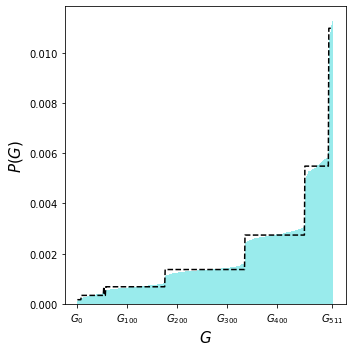

In [129]:
plt.figure(figsize=(5,5))
plt.bar(np.arange(len(y)),y,align='edge',color='darkturquoise',alpha=.4,width=1)
plt.plot(np.arange(len(y)),p,'--',color='k')
plt.xticks([0,100,200,300,400,511],[r'$G_0$',r'$G_{100}$',r'$G_{200}$',r'$G_{300}$',r'$G_{400}$',r'$G_{511}$'])
plt.xlabel('$G$',fontsize=15)
plt.ylabel('$P(G)$',fontsize=15)
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig1/canonical_dist.pdf')

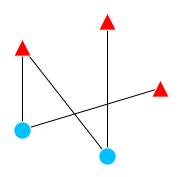

In [116]:
draw_two_particle_network(nx.from_numpy_array(np.array(uniq_canonical_networks[x[402]]).reshape((5,5))),X,figsize=(3,3),pos=nx.circular_layout(nx.from_numpy_array(np.array(uniq_canonical_networks[0]).reshape((5,5)))),file='figs/drafts/v2/fig1/G402.pdf')

In [89]:
draw_two_particle_network(nx.from_numpy_array(np.array(uniq_canonical_networks[x[402]]).reshape((5,5))),X,pos=nx.circular_layout(nx.from_numpy_array(np.array(uniq_canonical_networks[0]).reshape((5,5)))))

NameError: name 'uniq_canonical_networks' is not defined

In [127]:
y[511], 10**(-3)

(np.float64(0.01137), 0.001)

In [97]:
def canonical_ensemble(N_vec,O,X,directed=False):
    """
    Generate the canonical ensemble for network design.
    
    Parameters:
        N_vec (ndarray) - distribution of particle types
        O (ndarray) - connection matrix
        X (ndarray) - node assignment matrix (one hot encoded)
        directed (bool) - return a directed network
    
    Returns:
        g (nx.Graph or nx.DiGraph)
    """
    # Get number of nodes
    N = np.sum(N_vec)
    # Generate probability matrix
    P = np.zeros((N,N))
    if directed:
        for i in range(N):
            for j in range(N):
                # Get labels of nodes
                theta_i = np.where(X[i]==1)[0][0]
                theta_j = np.where(X[j]==1)[0][0]
                P[i,j] = O[theta_i,theta_j] / N_vec[theta_j]
    else:
        for i in range(N):
            for j in range(i,N):
                # Get labels of nodes
                theta_i = np.where(X[i]==1)[0][0]
                theta_j = np.where(X[j]==1)[0][0]
                P[i,j] = np.min([1,np.min([O[theta_i,theta_j]/N_vec[theta_j],O[theta_j,theta_i]/N_vec[theta_i]])])
    
    # Generate random samples
    r = np.random.random(size=(N,N))
    # Compare
    idx = np.where(r < P)
    
    A = np.zeros((N,N))
    if directed:
        A[idx[0],idx[1]] = 1
    else:
        A[idx[0],idx[1]] = 1
        A = np.triu(A) + np.triu(A).T
    
    if directed:
        return nx.from_numpy_array(A,create_using=nx.DiGraph)
    else:
        return nx.from_numpy_array(A), P

In [102]:
g,P=canonical_ensemble(N_vec,O,X)

In [137]:
r = np.random.random(size=(5,5))

In [138]:
A = np.zeros((5,5))
A[np.where(r<P)] = 1


In [140]:
np.triu(A) + np.triu(A).T

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1.],
       [1., 0., 1., 2., 0.],
       [0., 1., 1., 0., 0.]])

In [179]:
master_eq = nd.NetDesign(X,capacities)
master_eq.simulate(10000)

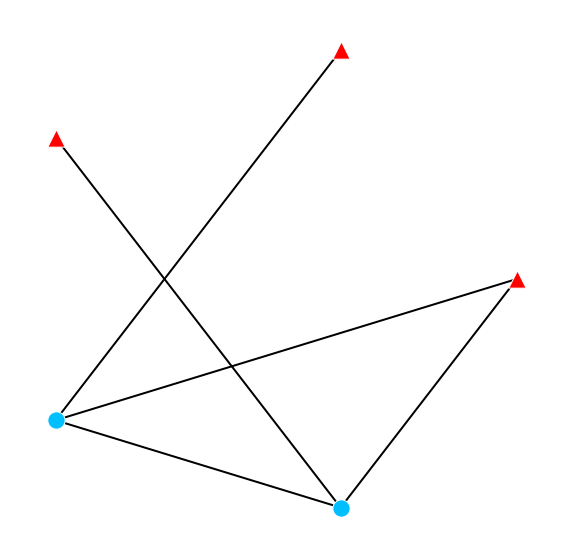

In [180]:
draw_two_particle_network(master_eq.g,X,pos=nx.circular_layout(master_eq.g))

In [40]:
# master_A = []
for _ in range(1000):
    master_eq = nd.NetDesign(X,capacities)
    master_eq.simulate(1000,multilinks=True)
    master_A.append(nx.adjacency_matrix(master_eq.g).toarray())

In [10]:
len(uniq_master_networks)

9

In [41]:
uniq_master_networks = list(set([tuple(master_A[i].flatten()) for i in range(len(master_A))]))

In [42]:
master_count = {i: 0 for i in range(len(uniq_master_networks))}
for A in master_A:
    for j in range(len(uniq_master_networks)):
        if np.linalg.norm(A - np.array(uniq_master_networks[j]).reshape(5,5)) == 0:
            master_count[j] += 1
            continue

In [43]:
P_master = np.zeros((5,5))
for i in range(5):
    for j in range(i,5):
        # Get labels of nodes
        theta_i = np.where(X[i]==1)[0][0]
        theta_j = np.where(X[j]==1)[0][0]
        P_master[i,j] = np.min([O[theta_i,theta_j],O[theta_j,theta_i]])/np.max([N_vec[theta_j],N_vec[theta_i]])

In [49]:
x = np.arange(len(uniq_master_networks))
y = np.array(list(master_count.values()),dtype=float)
y /= y.sum()
# idx = np.argsort(y)
# y = y[idx]

# x = x[idx]

In [50]:
# Calculate expected probability
p_master = np.zeros(len(y))
for q,k in enumerate(x):
    # Get network
    A = np.array(uniq_master_networks[k]).reshape(5,5)
    cur_p = 1
    for i in range(len(A)):
        for j in range(i,len(A)):
            cur_p *= P[i,j]**A[i,j]
    p_master[q] = cur_p
    

In [51]:
p_master, 1/9

(array([0.09876543, 0.09876543, 0.09876543, 0.09876543, 0.09876543,
        0.09876543, 0.09876543, 0.09876543, 0.09876543]),
 0.1111111111111111)

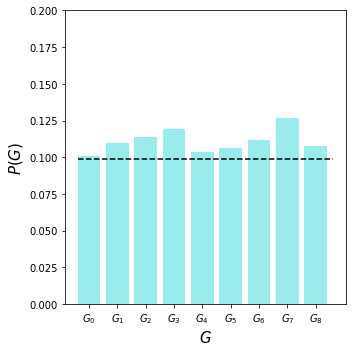

In [52]:
plt.figure(figsize=(5,5))
plt.bar(np.arange(len(y)),y,align='edge',color='darkturquoise',alpha=.4)
plt.plot(np.arange(len(y)+1),[0.09876543 for i in range(10)],'--',color='k')
plt.xticks(np.array([.4,1.4,2.4,3.4,4.4,5.4,6.4,7.4,8.4]),[f'$G_{i}$' for i in range(9)])
plt.xlabel('$G$',fontsize=15)
plt.ylabel('$P(G)$',fontsize=15)
plt.ylim(0,.2)
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig1/master_dist.pdf')
plt.show()

In [120]:
# master_eq = nd.NetDesign(X,capacities)
master_eq.simulate(8,multilinks=True)
test = nx.Graph()
test.add_nodes_from([0,1,2,3,4])

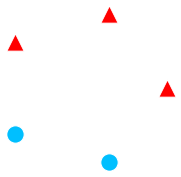

In [128]:
draw_two_particle_network(test,X,pos=nx.circular_layout(test),figsize=(3,3),file='figs/drafts/v2/fig1/t0.pdf')

In [66]:
master_eq.g.nodes()

NodeView(())

# Fig. 2
The difference between directed and undirected network design.

In [26]:
g=nd.new_soup_of_nodes(X,nd.create_capacity(X,capacities),directed=True,self_loops=False)

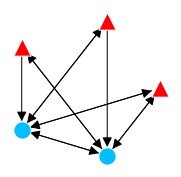

In [40]:
draw_two_particle_network(g,X,pos=nx.circular_layout(g),directed=True,figsize=(3,3))

In [77]:
A_dir = []
for _ in range(10000):
    g=nd.new_soup_of_nodes(X,nd.create_capacity(X,capacities),directed=True,self_loops=False)
    A_dir.append(nx.adjacency_matrix(g).toarray())

In [78]:
uniq_dir_networks = set([tuple(A_dir[i].flatten()) for i in range(len(A_dir))])

In [79]:
pos = nx.circular_layout(g)

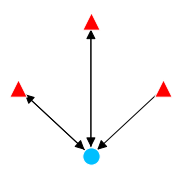

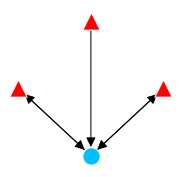

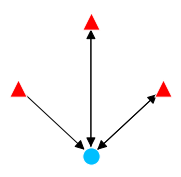

In [80]:
for i,A in enumerate(uniq_dir_networks):
    draw_two_particle_network(nx.from_numpy_array(np.array(A).reshape(4,4),create_using=nx.DiGraph),X,pos=pos,figsize=(3,3),file=f'figs/drafts/v2/fig1/four_particles/dir_g{i}.pdf',directed=True)

In [47]:
A_dir

[array([[0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [0, 1, 1, 0, 1],
        [1, 0, 1, 1, 0]]),
 array([[0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [1, 0, 1, 0, 1],
        [1, 0, 1, 1, 0]]),
 array([[0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [1, 1, 0, 0, 1],
        [0, 1, 1, 1, 0]]),
 array([[0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [1, 1, 0, 0, 1],
        [0, 1, 1, 1, 0]]),
 array([[0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [1, 1, 0, 0, 1],
        [1, 1, 0, 1, 0]]),
 array([[0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [1, 0, 1, 0, 1],
        [1, 1, 0, 1, 0]]),
 array([[0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [1, 1, 0, 0, 1],
        [1, 1, 0, 1, 0]]),
 array([[0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [0, 1, 1, 0, 1],
        [1,

# Fig. 3

We want to redesign a triangular lattice.

In [328]:
capacities = {0:{0:1,1:1,2:1,3:1,4:0},1:{0:1,1:0,2:1,3:0,4:1},
              2:{0:1,1:1,2:0,3:0,4:1},3:{0:1,1:0,2:0,3:0,4:1},
              4:{0:0,1:1,2:1,3:1,4:0}}

In [373]:
X = np.zeros((84,5))
X[:20,0] = 1
X[20:40,1] = 1
X[40:60,2] = 1
X[60:80,3] = 1
X[80:,4] = 1

In [378]:
g,cap = nd.new_soup_of_nodes(X,nd.create_capacity(X,capacities),ret_cap=True,self_loops=False)

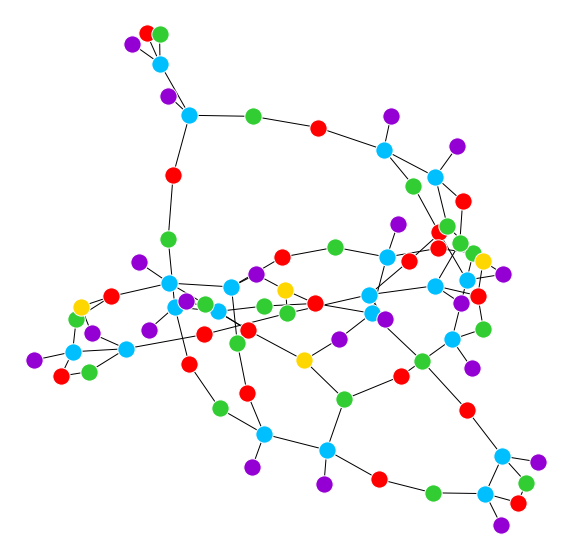

In [379]:
draw_lattice_particle_network(g,X,figsize=(10,10),file='figs/drafts/v2/fig4/large_ex3.pdf')

In [297]:
N_vec = np.array([2 for i in range(5)])
O = np.array([[0,1,1,1,1],[1,0,1,1,1],[1,1,0,1,1],[1,1,1,0,1],[1,1,1,1,0]])

In [298]:
g = nd.canonical_ensemble(N_vec,O,X)

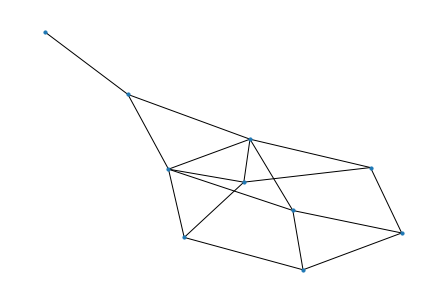

In [299]:
nx.draw(g,node_size=10)

In [333]:
master_eq_fig3 = nd.NetDesign(X,capacities)

In [334]:
master_eq_fig3.simulate(1000)

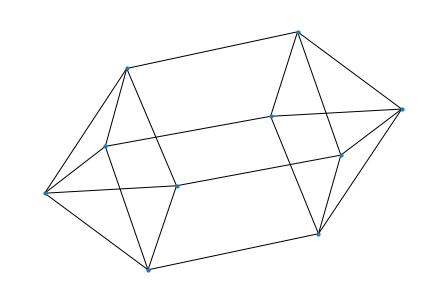

In [335]:
nx.draw(master_eq_fig3.g,node_size=10)

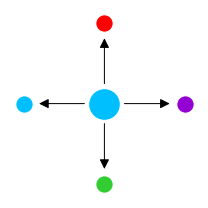

In [312]:
fig = plt.figure(figsize=(3,3))
lattice_particle_1 = nx.DiGraph()
lattice_particle_1.add_edges_from([[0,1],[0,2],[0,3],[0,4]])
lattice_particle_1_pos = np.array([[0,0],
                                   [0,1],
                                   [0,-1],
                                   [1,0],
                                   [-1,0]])
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_1,{0}),
                       pos=lattice_particle_1_pos,
                       node_color='deepskyblue',
                       linewidths=1,
                       edgecolors='w',
                      node_size=1000)
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_1,{1}),
                       pos=lattice_particle_1_pos,
                       node_color='red',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_1,{2}),
                       pos=lattice_particle_1_pos,
                       node_color='limegreen',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_1,{3}),
                       pos=lattice_particle_1_pos,
                       node_color='darkviolet',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_1,{4}),
                       pos=lattice_particle_1_pos,
                       node_color='deepskyblue',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_edges(lattice_particle_1,pos=lattice_particle_1_pos,arrowsize=20,min_source_margin=20,min_target_margin=15)
plt.axis('off')
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig4/particle_1.pdf')
plt.show()

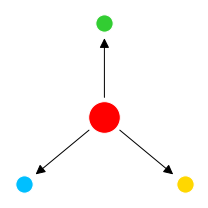

In [306]:
fig = plt.figure(figsize=(3,3))
lattice_particle_2 = nx.DiGraph()
lattice_particle_2.add_edges_from([[0,1],[0,2],[0,3]])
lattice_particle_2_pos = {0:(0,0),1:(-1,-1),2:(0,1.414214),3:(1,-1)}
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_1,{0}),
                       pos=lattice_particle_2_pos,
                       node_color='red',
                       linewidths=1,
                       edgecolors='w',
                      node_size=1000)
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_2,{1}),
                       pos=lattice_particle_2_pos,
                       node_color='deepskyblue',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_2,{2}),
                       pos=lattice_particle_2_pos,
                       node_color='limegreen',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_2,{3}),
                       pos=lattice_particle_2_pos,
                       node_color='gold',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_edges(lattice_particle_2,pos=lattice_particle_2_pos,arrowsize=20,min_source_margin=20,min_target_margin=15)
plt.axis('off')
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig4/particle_2.pdf')
plt.show()

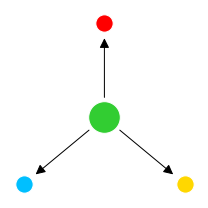

In [307]:
fig = plt.figure(figsize=(3,3))
lattice_particle_3 = nx.DiGraph()
lattice_particle_3.add_edges_from([[0,1],[0,2],[0,3]])
lattice_particle_3_pos = {0:(0,0),1:(-1,-1),2:(0,1.414214),3:(1,-1)}
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_3,{0}),
                       pos=lattice_particle_3_pos,
                       node_color='limegreen',
                       linewidths=1,
                       edgecolors='w',
                      node_size=1000)
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_3,{1}),
                       pos=lattice_particle_3_pos,
                       node_color='deepskyblue',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_3,{2}),
                       pos=lattice_particle_3_pos,
                       node_color='red',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_3,{3}),
                       pos=lattice_particle_3_pos,
                       node_color='gold',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_edges(lattice_particle_2,pos=lattice_particle_2_pos,arrowsize=20,min_source_margin=20,min_target_margin=15)
plt.axis('off')
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig4/particle_3.pdf')
plt.show()

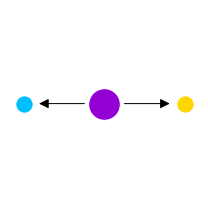

In [309]:
fig = plt.figure(figsize=(3,3))
lattice_particle_4 = nx.DiGraph()
lattice_particle_4.add_edges_from([[0,1],[0,2]])
lattice_particle_4_pos = {0:(0,0),1:(-1,0),2:(1,0)}
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_4,{0}),
                       pos=lattice_particle_4_pos,
                       node_color='darkviolet',
                       linewidths=1,
                       edgecolors='w',
                      node_size=1000)
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_4,{1}),
                       pos=lattice_particle_4_pos,
                       node_color='deepskyblue',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_4,{2}),
                       pos=lattice_particle_4_pos,
                       node_color='gold',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_edges(lattice_particle_4,pos=lattice_particle_4_pos,arrowsize=20,min_source_margin=20,min_target_margin=15)
plt.axis('off')
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig4/particle_4.pdf')
plt.show()

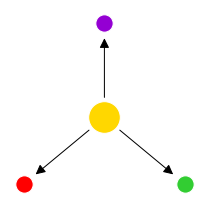

In [311]:
fig = plt.figure(figsize=(3,3))
lattice_particle_5 = nx.DiGraph()
lattice_particle_5.add_edges_from([[0,1],[0,2],[0,3]])
lattice_particle_5_pos = {0:(0,0),1:(-1,-1),2:(0,1.414214),3:(1,-1)}
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_5,{0}),
                       pos=lattice_particle_5_pos,
                       node_color='gold',
                       linewidths=1,
                       edgecolors='w',
                      node_size=1000)
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_5,{1}),
                       pos=lattice_particle_5_pos,
                       node_color='red',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_5,{2}),
                       pos=lattice_particle_5_pos,
                       node_color='darkviolet',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_nodes(nx.subgraph(lattice_particle_5,{3}),
                       pos=lattice_particle_5_pos,
                       node_color='limegreen',
                       linewidths=1,
                       edgecolors='w')
nx.draw_networkx_edges(lattice_particle_5,pos=lattice_particle_5_pos,arrowsize=20,min_source_margin=20,min_target_margin=15)
plt.axis('off')
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig4/particle_5.pdf')
plt.show()

In [331]:
def draw_lattice_particle_network(g,X,pos=None,file=None,figsize=(3,3),with_labels=False,directed=False):
    """
    Draw particle network in style of Fig. 1
    
    Parameters:
        g (networkx)
        X (ndarray) - node labels
    """
    fig = plt.figure(figsize=figsize)
    # create weighted graph from M
#     g = nx.Graph()
#     for u,v,data in M.edges(data=True):
#         w = data['weight'] if 'weight' in data else 1.0
#         if g.has_edge(u,v):
#             g[u][v]['weight'] += w
#         else:
#             g.add_edge(u, v, weight=w)
            
    if pos is None:
        pos = nx.spring_layout(g)
        
    
    for edge in g.edges(data='weight'):
        if directed:
            nx.draw_networkx_edges(g,pos=pos,edgelist=[edge],arrowsize=20)
        else:
            nx.draw_networkx_edges(g,pos=pos,edgelist=[edge])
    
    # Draw particles \theta_1
    nx.draw_networkx_nodes(nx.subgraph(g,set(np.where(X[:,0]==1)[0])),
                       pos=pos,
                       node_color='deepskyblue',
                       linewidths=1,
                       node_shape='o',
                       edgecolors='w')
    
    # Draw particles \theta_2
    nx.draw_networkx_nodes(nx.subgraph(g,set(np.where(X[:,1]==1)[0])),
                       pos=pos,
                       node_color='red',
                       linewidths=1,
                       node_shape='o',
                       edgecolors='w')
    
    nx.draw_networkx_nodes(nx.subgraph(g,set(np.where(X[:,2]==1)[0])),
                       pos=pos,
                       node_color='limegreen',
                       linewidths=1,
                       node_shape='o',
                       edgecolors='w')
    
    nx.draw_networkx_nodes(nx.subgraph(g,set(np.where(X[:,3]==1)[0])),
                       pos=pos,
                       node_color='darkviolet',
                       linewidths=1,
                       node_shape='o',
                       edgecolors='w')
    
    nx.draw_networkx_nodes(nx.subgraph(g,set(np.where(X[:,4]==1)[0])),
                       pos=pos,
                       node_color='gold',
                       linewidths=1,
                       node_shape='o',
                       edgecolors='w')
    
    
    if with_labels:
        nx.draw_networkx_labels(g,pos)
        
    if file != None:
        plt.savefig(file)
    plt.axis('off')
    plt.show()

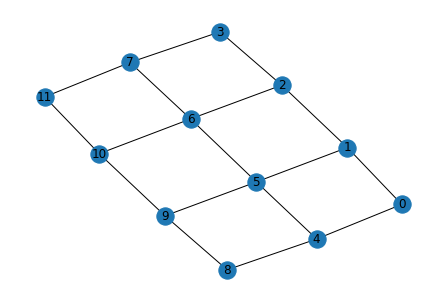

In [332]:
g = nx.lattice.grid_2d_graph(3,4)
g = nx.convert_node_labels_to_integers(g)
nx.draw(g,with_labels=True)

In [333]:
X = np.array([[0,0,0,0,1],
              [0,0,1,0,0],
              [0,1,0,0,0],
              [0,0,0,0,1],
              [0,0,0,1,0],
              [1,0,0,0,0],
              [1,0,0,0,0],
              [0,0,0,1,0],
              [0,0,0,0,1],
              [0,1,0,0,0],
              [0,0,1,0,0],
              [0,0,0,0,1]])

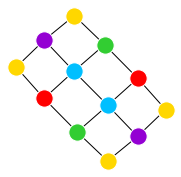

In [334]:
draw_lattice_particle_network(g,X,file='figs/drafts/v2/fig4/lattice.pdf')